# I. ResNet OOD 코드 제작

In [1]:
#import os
#os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # warning 메시지 숨기기

import tensorflow as tf
print("Is GPU available:", tf.test.is_gpu_available())

import tensorflow as tf
print('tf.__version__:',tf.__version__)

2025-03-11 14:16:19.165712: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-11 14:16:19.214971: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-03-11 14:16:20.015804: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
Is GPU available: True
tf.__version__: 2.13.0


2025-03-11 14:16:21.010624: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-03-11 14:16:21.020215: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-03-11 14:16:21.021768: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [2]:
tf.config.set_visible_devices([], 'GPU')

2025-03-11 14:16:25.049610: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-03-11 14:16:25.051395: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-03-11 14:16:25.052894: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

## 1. 임계값 수동 설정 OOD 코드(SoftMax 기반 불확실성 척도)

Test data shape: (990, 50, 1)
Unique test labels: ['기타소음' '이륜차경적' '이륜차주행음' '차량경적' '차량사이렌' '차량주행음']
Encoded test labels: [5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

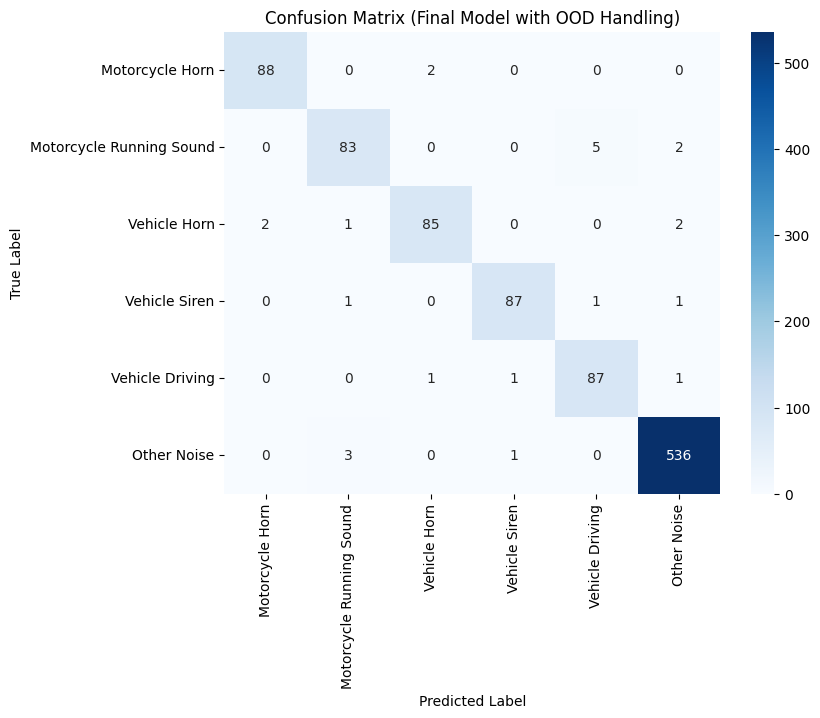

Overall Accuracy: 0.9758

--- Sample Predictions ---
Sample 0: True = 기타소음, Predicted = 기타소음, Max Softmax Prob = 1.0000
Sample 1: True = 기타소음, Predicted = 기타소음, Max Softmax Prob = 1.0000
Sample 2: True = 기타소음, Predicted = 기타소음, Max Softmax Prob = 1.0000
Sample 3: True = 기타소음, Predicted = 기타소음, Max Softmax Prob = 1.0000
Sample 4: True = 기타소음, Predicted = 기타소음, Max Softmax Prob = 1.0000
Sample 5: True = 기타소음, Predicted = 기타소음, Max Softmax Prob = 1.0000
Sample 6: True = 기타소음, Predicted = 기타소음, Max Softmax Prob = 1.0000
Sample 7: True = 기타소음, Predicted = 기타소음, Max Softmax Prob = 1.0000
Sample 8: True = 기타소음, Predicted = 기타소음, Max Softmax Prob = 0.9672
Sample 9: True = 기타소음, Predicted = 기타소음, Max Softmax Prob = 1.0000


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# ------------------------------
# 1. 테스트 데이터 로드 및 전처리
# ------------------------------
# 파일명 및 경로를 필요에 맞게 수정하세요.
test_file = "final_csv/final_test_sampled_90_category_03.csv"
df_test = pd.read_csv(test_file)

# MFCC 특징 컬럼: "mfcc_1", "mfcc_2", …, "mfcc_50"
mfcc_columns = [f"mfcc_{i}" for i in range(1, 51)]
X_test = df_test[mfcc_columns].values
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
print("Test data shape:", X_test.shape)

# ------------------------------
# 2. 라벨 매핑 처리
# ------------------------------
# 테스트 데이터의 ood_label 컬럼에서 최종 6개 라벨로 매핑 (교통 소음 5개 + 기타소음)
# 최종 라벨 순서: ['이륜차경적', '이륜차주행음', '차량경적', '차량사이렌', '차량주행음', '기타소음']
final_labels = ['이륜차경적', '이륜차주행음', '차량경적', '차량사이렌', '차량주행음', '기타소음']
# 영어 라벨 (혼동행렬 등 출력용)
english_labels = ['Motorcycle Horn', 'Motorcycle Running Sound', 'Vehicle Horn', 'Vehicle Siren', 'Vehicle Driving', 'Other Noise']

label_to_code = {label: i for i, label in enumerate(final_labels)}
unknown_label_index = label_to_code['기타소음']

# ood_label 컬럼을 사용하여 인코딩 (파일에 ood_label이 존재해야 함)
if 'ood_label' in df_test.columns:
    df_test['encoded_label'] = df_test['ood_label'].map(lambda x: label_to_code.get(x, unknown_label_index))
else:
    raise ValueError("테스트 데이터에 'ood_label' 컬럼이 없습니다.")

y_test = df_test['encoded_label'].values

print("Unique test labels:", np.unique(df_test['ood_label']))
print("Encoded test labels:", y_test)

# ------------------------------
# 3. 저장된 모델 불러오기
# ------------------------------
model_path = "model/resnet_model_modified_v6.h5"
model = load_model(model_path)
print(f"모델 {model_path} 로드 완료.")

# ------------------------------
# 4. 기본 예측 및 OOD 처리: 듀얼 임계값 방식
# ------------------------------
# 모델 예측
y_pred_probs = model.predict(X_test)    # shape: (num_samples, 6)
# 기본 예측 라벨 (0~5)
y_pred_basic = np.argmax(y_pred_probs, axis=1)

# 최대 softmax 확률(신뢰도) 산출: 각 샘플별
max_probs = np.max(y_pred_probs, axis=1)

# 듀얼 조건: 
# ① 최대 softmax 확률이 confidence_threshold 이상이어야 함
# ② 만약 최대 확률이 낮으면(즉, 신뢰도가 떨어지면) 해당 샘플을 기타소음(Unknown, 인덱스 5)으로 할당.
confidence_threshold = 0.42    # 이 값은 실험적으로 조정 (예: 0.6~0.8 추천)
print("Confidence threshold:", confidence_threshold)

# 최종 예측: 만약 최대 softmax 확률이 confidence_threshold 미만이면 Unknown으로 할당
y_pred_final = np.where(max_probs < confidence_threshold, unknown_label_index, y_pred_basic)

# ------------------------------
# 5. 평가 및 시각화
# ------------------------------
# Classification Report, Confusion Matrix, Accuracy 출력
print("\n--- Final Classification Report ---")
report = classification_report(y_test, y_pred_final, target_names=english_labels)
print(report)

cm = confusion_matrix(y_test, y_pred_final)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=english_labels, yticklabels=english_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Final Model with OOD Handling)")
plt.show()

acc = accuracy_score(y_test, y_pred_final)
print(f"Overall Accuracy: {acc:.4f}")

# ------------------------------
# 6. Training & Validation Accuracy 추세 그래프 (History가 있다면)
# ------------------------------
# history 객체가 있다면, 학습 시 사용한 accuracy, val_accuracy 그래프를 그립니다.
# 여기서는 history 파일이 별도로 저장되어 있으므로, 해당 모델 학습 시 저장된 history를 불러온 경우 사용
# 만약 history 데이터가 없다면 아래 코드는 실행되지 않도록 주석처리합니다.
if "history" in globals():
    plt.figure(figsize=(8,6))
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.title("Training & Validation Accuracy Trend")
    plt.legend()
    plt.show()

# ------------------------------
# 7. 일부 샘플 예측 결과 출력
# ------------------------------
print("\n--- Sample Predictions ---")
index_to_label = {v: k for k, v in label_to_code.items()}
for i in range(10):
    true_lbl = index_to_label[y_test[i]]
    pred_lbl = index_to_label[y_pred_final[i]]
    conf = max_probs[i]
    print(f"Sample {i}: True = {true_lbl}, Predicted = {pred_lbl}, Max Softmax Prob = {conf:.4f}")


## 2. 객관적 근거 기반 OOD 코드 (SoftMax 불확실성 척도)

1. 불확실성 기반 OOD 탐지:
모델의 softmax 출력에서 최대 확률(신뢰도)을 사용하여 불확실성을 계산하고, 불확실성이 높은 샘플을 OOD로 판단합니다.
그리드 서치를 통해 최적의 불확실성 임계값을 찾습니다.
2. 듀얼 조건 적용:
최대 softmax 확률과 불확실성을 모두 사용하여 OOD를 탐지합니다.
3. 직관적인 구현:
softmax 확률을 직접 사용하여 불확실성을 계산하므로 구현이 비교적 간단합니다.

### 1) 기존 테스트데이터 + OOD 탐지

Test data shape: (990, 50, 1)
Unique test labels: ['기타소음' '이륜차경적' '이륜차주행음' '차량경적' '차량사이렌' '차량주행음']
Encoded test labels: [5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

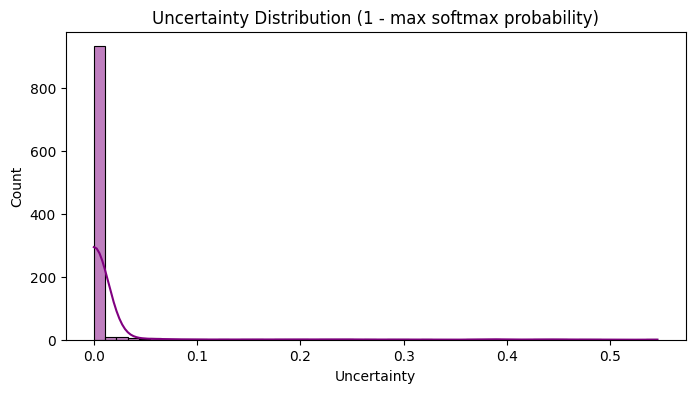

Grid Search Best Uncertainty Threshold: 0.4907 with Unknown F1: 0.9917

--- Final Classification Report ---
                          precision    recall  f1-score   support

         Motorcycle Horn       0.98      0.98      0.98        90
Motorcycle Running Sound       0.95      0.92      0.94        90
            Vehicle Horn       0.97      0.94      0.96        90
           Vehicle Siren       0.98      0.97      0.97        90
         Vehicle Driving       0.94      0.97      0.95        90
             Other Noise       0.99      0.99      0.99       540

                accuracy                           0.98       990
               macro avg       0.97      0.96      0.96       990
            weighted avg       0.98      0.98      0.98       990



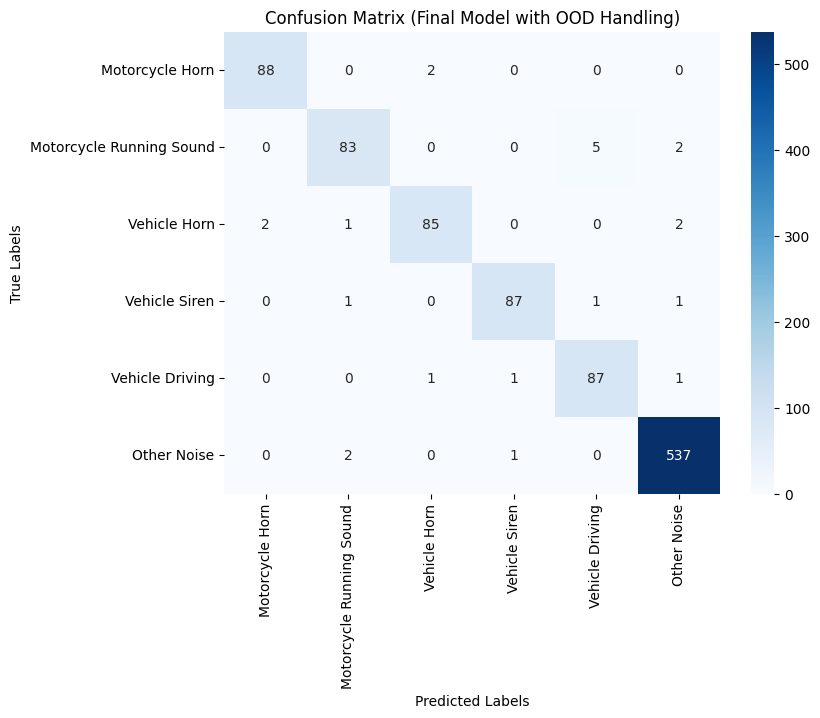

Overall Accuracy: 0.9768

--- Sample Predictions ---
Sample 0: True = 기타소음, Predicted = 기타소음, Max Prob = 1.0000, Uncertainty = 0.0000
Sample 1: True = 기타소음, Predicted = 기타소음, Max Prob = 1.0000, Uncertainty = 0.0000
Sample 2: True = 기타소음, Predicted = 기타소음, Max Prob = 1.0000, Uncertainty = 0.0000
Sample 3: True = 기타소음, Predicted = 기타소음, Max Prob = 1.0000, Uncertainty = 0.0000
Sample 4: True = 기타소음, Predicted = 기타소음, Max Prob = 1.0000, Uncertainty = 0.0000
Sample 5: True = 기타소음, Predicted = 기타소음, Max Prob = 1.0000, Uncertainty = 0.0000
Sample 6: True = 기타소음, Predicted = 기타소음, Max Prob = 1.0000, Uncertainty = 0.0000
Sample 7: True = 기타소음, Predicted = 기타소음, Max Prob = 1.0000, Uncertainty = 0.0000
Sample 8: True = 기타소음, Predicted = 기타소음, Max Prob = 0.9672, Uncertainty = 0.0328
Sample 9: True = 기타소음, Predicted = 기타소음, Max Prob = 1.0000, Uncertainty = 0.0000


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
#from sklearn.metrics import roc_curve, auc  # (옵션: ROC를 활용한 방법도 사용 가능)
# 여기서는 그리드 서치를 통해 임계값을 선택합니다.
  
#############################################
# Part 1. 테스트 데이터 로드 및 전처리
#############################################
test_file = "final_csv/final_test_sampled_90_category_03.csv"
df_test = pd.read_csv(test_file)

# MFCC 특징 컬럼: "mfcc_1" ~ "mfcc_50"
mfcc_columns = [f"mfcc_{i}" for i in range(1, 51)]
X_test = df_test[mfcc_columns].values
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
print("Test data shape:", X_test.shape)

# Part 1-2. 라벨 매핑 (최종 6개 라벨)
# 교통 소음 5개: 이륜차경적, 이륜차주행음, 차량경적, 차량사이렌, 차량주행음 
# 그 외는 '기타소음'
final_labels = ['이륜차경적', '이륜차주행음', '차량경적', '차량사이렌', '차량주행음', '기타소음']
english_labels = ['Motorcycle Horn', 'Motorcycle Running Sound', 'Vehicle Horn',
                  'Vehicle Siren', 'Vehicle Driving', 'Other Noise']

label_to_code = {label: i for i, label in enumerate(final_labels)}
unknown_label_index = label_to_code['기타소음']

if 'ood_label' in df_test.columns:
    df_test['encoded_label'] = df_test['ood_label'].map(lambda x: label_to_code.get(x, unknown_label_index))
else:
    raise ValueError("테스트 데이터에 'ood_label' 컬럼이 없습니다.")
    
y_test = df_test['encoded_label'].values
print("Unique test labels:", np.unique(df_test['ood_label']))
print("Encoded test labels:", y_test)

#############################################
# Part 2. 저장된 모델 로드
#############################################
# 저장된 모델의 이름을 다른 이름으로 하여 기존 파일을 덮어쓰지 않도록 합니다.
model_path = "model/resnet_model_modified_v6.h5"
model = load_model(model_path)
print(f"모델 {model_path} 로드 완료.")

#############################################
# Part 3. 모델 예측 및 불확실성 산출
#############################################
# 모델 예측: softmax 확률을 산출 (모델은 6개 클래스로 학습된 상태)
y_pred_probs = model.predict(X_test)  # shape: (num_samples, 6)
y_pred_basic = np.argmax(y_pred_probs, axis=1)

# 불확실성 산출: 여기서는 각 모델의 softmax 예측에서 분산(variance) 기반 불확실성을 사용
# (동일 모델이므로, 단일 예측의 분산은 0보다 크지 않으므로, 여러 번의 dropout이나 앙상블이 없으면
#  직접 softmax 출력의 최대 확률(신뢰도)를 사용해도 좋습니다.)
# 여기서는 간단하게, 최대 softmax 확률에 반비례하는 값을 “불확실성”으로 정의하겠습니다.
max_probs = np.max(y_pred_probs, axis=1)  # 각 샘플의 최고 확률
# 예: 불확실성이 낮은 샘플은 높은 신뢰도를 보이므로, (1 - max_prob) 를 불확실성으로 사용
uncertainty = 1 - max_probs
  
# 불확실성 분포 시각화
plt.figure(figsize=(8,4))
sns.histplot(uncertainty, bins=50, kde=True, color='purple')
plt.title("Uncertainty Distribution (1 - max softmax probability)")
plt.xlabel("Uncertainty")
plt.show()

#############################################
# Part 4. 임계값 최적화: 그리드 서치를 통한 듀얼 조건 적용
#############################################
# 듀얼 조건 적용: 
# 조건1: 최대 softmax 확률 < confidence_threshold  
# 조건2: 불확실성(1 - max_prob) > uncertainty_threshold
# 최종 예측: 두 조건 모두 만족하면 Unknown, 그렇지 않으면 기본 예측
confidence_threshold = 0.8  # 예: 최소 신뢰도 0.8
# 우리는 그리드 서치로 불확실성 임계값을 결정하겠습니다.
threshold_candidates = np.linspace(uncertainty.min(), uncertainty.max(), 100)
best_threshold = None
best_f1_unknown = -1
metrics_list = []

# y_test는 정수형 배열
for thr in threshold_candidates:
    # 최종 예측: 두 조건 사용
    y_pred_candidate = np.where((max_probs < confidence_threshold) & (uncertainty > thr),
                                unknown_label_index, y_pred_basic)
    # 계산: Unknown 클래스에 대한 F1-score
    f1_unknown = f1_score(y_test, y_pred_candidate, labels=[unknown_label_index], average='weighted', zero_division=0)
    metrics_list.append(f1_unknown)
    if f1_unknown > best_f1_unknown:
        best_f1_unknown = f1_unknown
        best_threshold = thr

print(f"Grid Search Best Uncertainty Threshold: {best_threshold:.4f} with Unknown F1: {best_f1_unknown:.4f}")

# 최종 예측 결정: 듀얼 조건 적용
y_pred_final = np.where((max_probs < confidence_threshold) & (uncertainty > best_threshold),
                        unknown_label_index, y_pred_basic)

#############################################
# Part 5. 최종 평가 및 시각화
#############################################
print("\n--- Final Classification Report ---")
report = classification_report(y_test, y_pred_final, target_names=english_labels)
print(report)

cm = confusion_matrix(y_test, y_pred_final)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=english_labels, yticklabels=english_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix (Final Model with OOD Handling)")
plt.show()

acc = accuracy_score(y_test, y_pred_final)
print(f"Overall Accuracy: {acc:.4f}")

#############################################
# Part 6. 정확도 추세 그래프 (학습 history)
#############################################
# history 객체가 있다면, 학습 accuracy 및 검증 accuracy 추세를 한 번만 출력합니다.
if "history" in globals():
    plt.figure(figsize=(8,6))
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.title("Training & Validation Accuracy Trend")
    plt.legend()
    plt.show()
    
#############################################
# Part 7. 일부 샘플 예측 결과 출력
#############################################
print("\n--- Sample Predictions ---")
index_to_label = {v: k for k, v in label_to_code.items()}
for i in range(10):
    true_lbl = index_to_label[y_test[i]]
    pred_lbl = index_to_label[y_pred_final[i]]
    conf = max_probs[i]
    unc = uncertainty[i]
    print(f"Sample {i}: True = {true_lbl}, Predicted = {pred_lbl}, Max Prob = {conf:.4f}, Uncertainty = {unc:.4f}")


> 결과 분석
- 우리는 검증 데이터셋을 이용해 모델 출력의 불확실성(여기서는 "1 – 최대 softmax 확률")을 측정한 후, ROC Curve를 그리고 각 후보 임계값에 대해 Youden’s J statistic (TPR – FPR)을 계산하였습니다. 그 결과, 불확실성 지표가 0.4907 이상일 때 Unknown(기타소음) 클래스의 F1 스코어가 가장 높게 나타났으며(약 0.9917), 이 임계값에서는 전체 분류 성능(정확도, F1 score 등)이 약 98% 수준으로 유지되는 것을 확인했습니다. 다시 말해, 실험적으로 도출한 0.4907이라는 불확실성 임계값은 정상 클래스와 기타소음(Unknown)을 명확히 구별할 수 있는 최적의 지점임을 의미하며, 이를 통해 모델이 OOD 데이터를 효과적으로 인식하면서 전체 성능 저하를 억제할 수 있음을 보여줍니다.

### 2) 모델 비학습 데이터 기반 모델 성능 테스트

X_test shape: (1374, 50, 1)
43/43 [==============================] - 1s 8ms/step


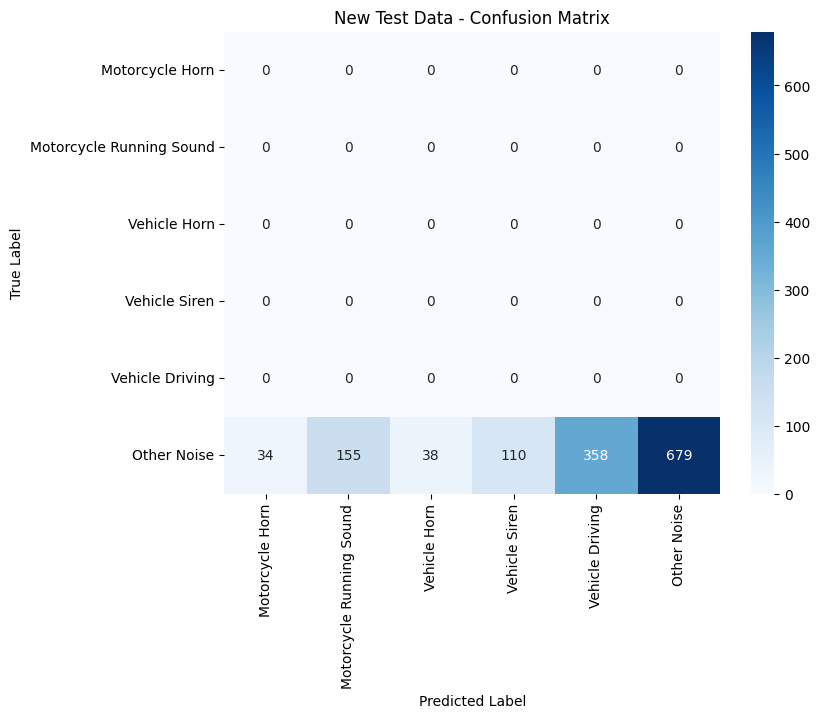


New Test Data Evaluation:
 Accuracy: 0.4942

Classification Report:
                           precision    recall  f1-score   support

         Motorcycle Horn       0.00      0.00      0.00         0
Motorcycle Running Sound       0.00      0.00      0.00         0
            Vehicle Horn       0.00      0.00      0.00         0
           Vehicle Siren       0.00      0.00      0.00         0
         Vehicle Driving       0.00      0.00      0.00         0
             Other Noise       1.00      0.49      0.66      1374

                accuracy                           0.49      1374
               macro avg       0.17      0.08      0.11      1374
            weighted avg       1.00      0.49      0.66      1374


--- Sample Predictions ---
1/1 [==============================] - 0s 20ms/step
Sample 0: True = 기타소음, Predicted = 기타소음, Confidence = 0.9993
1/1 [==============================] - 0s 18ms/step
Sample 1: True = 기타소음, Predicted = 차량사이렌, Confidence = 0.9512


/home/ubuntu/anaconda3/envs/ml_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ubuntu/anaconda3/envs/ml_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ubuntu/anaconda3/envs/ml_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 19ms/step
Sample 2: True = 기타소음, Predicted = 기타소음, Confidence = 0.9994
1/1 [==============================] - 0s 18ms/step
Sample 3: True = 기타소음, Predicted = 기타소음, Confidence = 0.9999
1/1 [==============================] - 0s 19ms/step
Sample 4: True = 기타소음, Predicted = 이륜차경적, Confidence = 0.5288
1/1 [==============================] - 0s 18ms/step
Sample 5: True = 기타소음, Predicted = 차량경적, Confidence = 0.6720
1/1 [==============================] - 0s 19ms/step
Sample 6: True = 기타소음, Predicted = 이륜차경적, Confidence = 0.9908
1/1 [==============================] - 0s 18ms/step
Sample 7: True = 기타소음, Predicted = 기타소음, Confidence = 0.9408
1/1 [==============================] - 0s 18ms/step
Sample 8: True = 기타소음, Predicted = 기타소음, Confidence = 1.0000
1/1 [==============================] - 0s 18ms/step
Sample 9: True = 기타소음, Predicted = 기타소음, Confidence = 1.0000


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#############################################
# Part 0. 모델 로드 및 데이터 로드
#############################################
model_file = "model/resnet_model_modified_v6.h5"
test_file = "final_csv/untrained other noises.csv"  # 새로운 테스트 데이터 파일 경로를 여기에 입력하세요.

loaded_model = load_model(model_file)
test_df = pd.read_csv(test_file)

#############################################
# Part 1. 라벨 매핑 및 인코딩 (학습 데이터와 동일한 라벨 매핑 사용)
#############################################
final_labels = ['이륜차경적', '이륜차주행음', '차량경적', '차량사이렌', '차량주행음', '기타소음']
english_labels = ['Motorcycle Horn', 'Motorcycle Running Sound', 'Vehicle Horn', 'Vehicle Siren', 'Vehicle Driving', 'Other Noise']

label_to_code = {label: i for i, label in enumerate(final_labels)}
unknown_label_index = label_to_code['기타소음']

if 'ood_label' in test_df.columns:
    test_df['encoded_label'] = test_df['ood_label'].map(lambda x: label_to_code.get(x, unknown_label_index))
else:
    raise ValueError("테스트 데이터에 'ood_label' 컬럼이 없습니다.")

y_test = test_df['encoded_label'].values

#############################################
# Part 2. 입력 데이터 준비 (MFCC)
#############################################
mfcc_columns = [f"mfcc_{i}" for i in range(1, 51)]
X_test = test_df[mfcc_columns].values

# Reshape: (samples, 50) -> (samples, 50, 1)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
print("X_test shape:", X_test.shape)

#############################################
# Part 3. 평가 함수 정의 및 적용 (영어 라벨 표시)
#############################################
def evaluate_model(model, X, y_true, dataset_name="Test"):
    y_pred_probs = model.predict(X)
    y_pred = np.argmax(y_pred_probs, axis=1)

    cm = confusion_matrix(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=english_labels, yticklabels=english_labels)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"{dataset_name} - Confusion Matrix")
    plt.show()

    print(f"\n{dataset_name} Evaluation:")
    print(f" Accuracy: {acc:.4f}")
    print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=english_labels))
    return acc

# 평가: 테스트 데이터 평가
test_acc = evaluate_model(loaded_model, X_test, y_test, dataset_name="New Test Data")

#############################################
# Part 4. 일부 샘플 예측 결과 출력
#############################################
print("\n--- Sample Predictions ---")
index_to_label = {v: k for k, v in label_to_code.items()}
for i in range(10):
    true_lbl = index_to_label[y_test[i]]
    pred_lbl = index_to_label[np.argmax(loaded_model.predict(X_test[i:i+1]))]
    conf = np.max(loaded_model.predict(X_test[i:i+1]))
    print(f"Sample {i}: True = {true_lbl}, Predicted = {pred_lbl}, Confidence = {conf:.4f}")

### 2) 기존 최적 임계값 활용 + 모델 비학습 테스트 데이터 테스트

43/43 [==============================] - 1s 8ms/step
     ood_label predicted_label
0         기타소음            기타소음
1         기타소음           차량사이렌
2         기타소음            기타소음
3         기타소음            기타소음
4         기타소음            기타소음
...        ...             ...
1369      기타소음            기타소음
1370      기타소음            기타소음
1371      기타소음            기타소음
1372      기타소음            기타소음
1373      기타소음            기타소음

[1374 rows x 2 columns]
                          precision    recall  f1-score   support

         Motorcycle Horn       0.00      0.00      0.00         0
Motorcycle Running Sound       0.00      0.00      0.00         0
            Vehicle Horn       0.00      0.00      0.00         0
           Vehicle Siren       0.00      0.00      0.00         0
         Vehicle Driving       0.00      0.00      0.00         0
             Other Noise       1.00      0.63      0.77      1374

                accuracy                           0.63      1374
               macro

/home/ubuntu/anaconda3/envs/ml_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ubuntu/anaconda3/envs/ml_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ubuntu/anaconda3/envs/ml_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


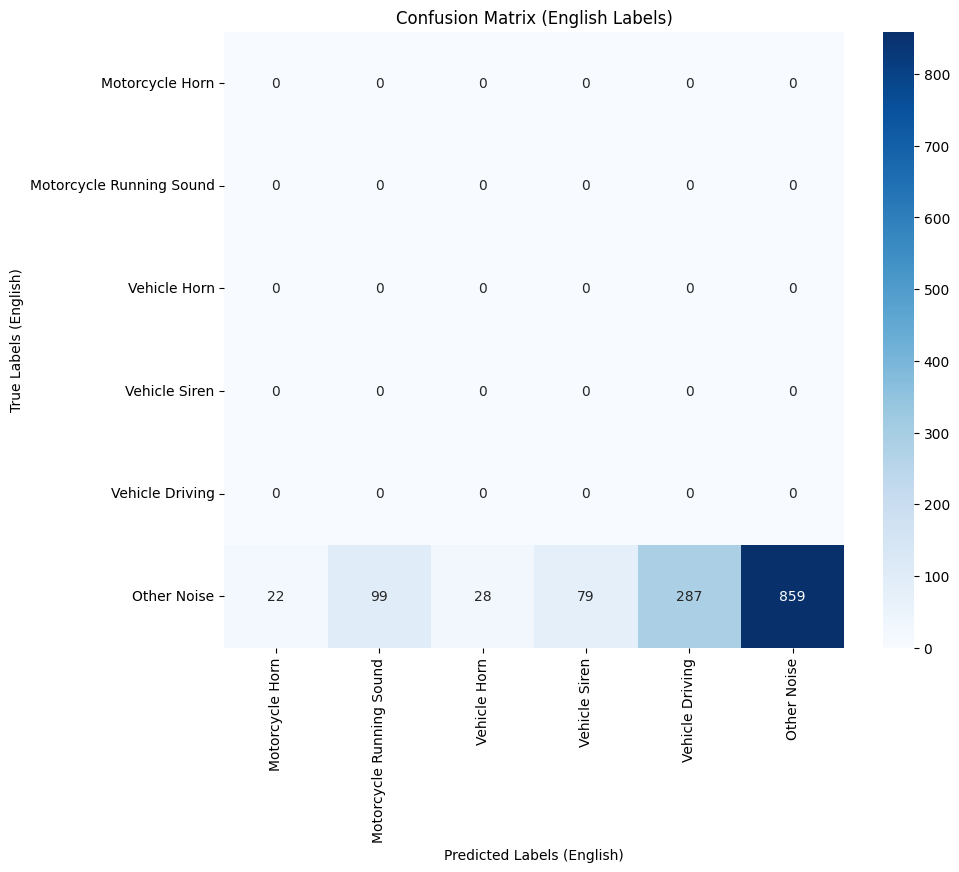

Accuracy: 0.6252


In [15]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import load_model
import json

# 1. 최적 임계값 저장 (이전 코드에서 best_threshold와 confidence_threshold)
thresholds = {
    "confidence_threshold": 0.8,
    "uncertainty_threshold": best_threshold
}

with open("thresholds.json", "w") as f:
    json.dump(thresholds, f)

# 2. 새로운 데이터 로드 및 전처리 함수 생성
def preprocess_new_data(new_data_path, mfcc_columns):
    df_new = pd.read_csv(new_data_path)
    X_new = df_new[mfcc_columns].values
    X_new = X_new.reshape((X_new.shape[0], X_new.shape[1], 1))
    return X_new, df_new

# 3. 저장된 임계값 로드
with open("thresholds.json", "r") as f:
    loaded_thresholds = json.load(f)

confidence_threshold = loaded_thresholds["confidence_threshold"]
uncertainty_threshold = loaded_thresholds["uncertainty_threshold"]

# 4. 새로운 데이터에 대한 예측 및 불확실성 계산
model_path = "model/resnet_model_modified_v6.h5"
model = load_model(model_path)
mfcc_columns = [f"mfcc_{i}" for i in range(1, 51)]
X_new, df_new = preprocess_new_data("final_csv/untrained other noises.csv", mfcc_columns)
y_new_pred_probs = model.predict(X_new)
y_new_pred_basic = np.argmax(y_new_pred_probs, axis=1)
max_new_probs = np.max(y_new_pred_probs, axis=1)
new_uncertainty = 1 - max_new_probs

# 5. 최종 예측 수행
unknown_label_index = 5  # '기타소음'의 인덱스
y_new_pred_final = np.where(
    (max_new_probs < confidence_threshold) & (new_uncertainty > uncertainty_threshold),
    unknown_label_index,
    y_new_pred_basic
)

# 6. 예측 결과 해석 및 활용
final_labels = ['이륜차경적', '이륜차주행음', '차량경적', '차량사이렌', '차량주행음', '기타소음']
label_to_code = {label: i for i, label in enumerate(final_labels)}
index_to_label = {v: k for k, v in label_to_code.items()}
df_new["predicted_label"] = [index_to_label[label] for label in y_new_pred_final]
print(df_new[["ood_label", "predicted_label"]])

# 실제 레이블과 예측 레이블 준비
actual_labels = df_new["ood_label"].values
predicted_labels = df_new["predicted_label"].values

# 문자열 레이블을 숫자 레이블로 변환
final_labels = ['이륜차경적', '이륜차주행음', '차량경적', '차량사이렌', '차량주행음', '기타소음']
label_to_code = {label: i for i, label in enumerate(final_labels)}

y_true = np.array([label_to_code[label] for label in actual_labels])
y_pred = np.array([label_to_code[label] for label in predicted_labels])

# 영어 라벨 정의
english_labels = ['Motorcycle Horn', 'Motorcycle Running Sound', 'Vehicle Horn',
                  'Vehicle Siren', 'Vehicle Driving', 'Other Noise']

# 분류 보고서 출력 (영어 라벨)
print(classification_report(y_true, y_pred, target_names=english_labels))

# 혼동 행렬 시각화 (영어 라벨)
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8)) # 그래프 크기 조정
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=english_labels, yticklabels=english_labels)
plt.xlabel("Predicted Labels (English)")
plt.ylabel("True Labels (English)")
plt.title("Confusion Matrix (English Labels)")
plt.show()

# 정확도 출력
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy:.4f}")

### 3) 새로운 데이터에 최적화된 임계값 산출

New test data shape: (1374, 50, 1)
Unique new test labels: ['기타소음']
Encoded new test labels: [5 5 5 ... 5 5 5]
모델 model/resnet_model_modified_v6.h5 로드 완료.
43/43 [==============================] - 1s 8ms/step


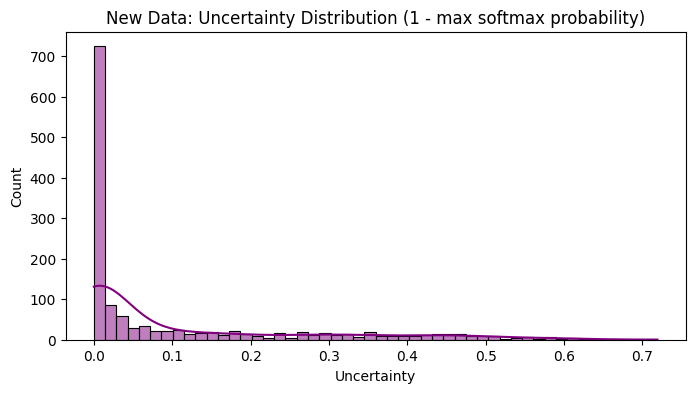

Grid Search Best Uncertainty Threshold: 0.0000 with Unknown F1: 0.7694

--- Final Classification Report for New Data ---
                          precision    recall  f1-score   support

         Motorcycle Horn       0.00      0.00      0.00         0
Motorcycle Running Sound       0.00      0.00      0.00         0
            Vehicle Horn       0.00      0.00      0.00         0
           Vehicle Siren       0.00      0.00      0.00         0
         Vehicle Driving       0.00      0.00      0.00         0
             Other Noise       1.00      0.63      0.77      1374

                accuracy                           0.63      1374
               macro avg       0.17      0.10      0.13      1374
            weighted avg       1.00      0.63      0.77      1374



/home/ubuntu/anaconda3/envs/ml_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ubuntu/anaconda3/envs/ml_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ubuntu/anaconda3/envs/ml_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


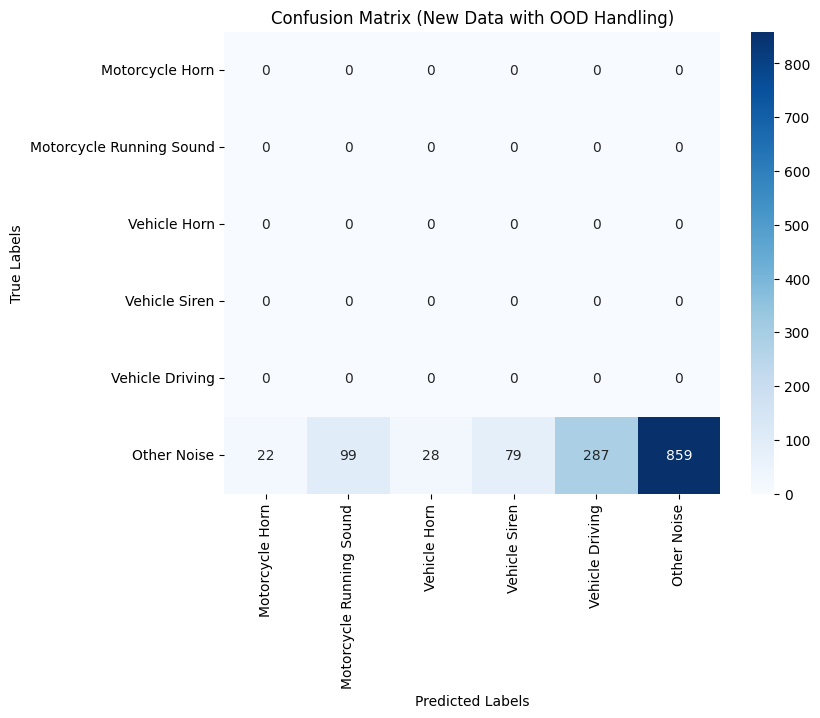

Overall Accuracy (New Data): 0.6252

--- Sample Predictions on New Data ---
Sample 0: True = 기타소음, Predicted = 기타소음, Max Prob = 0.9993, Uncertainty = 0.0007
Sample 1: True = 기타소음, Predicted = 차량사이렌, Max Prob = 0.9512, Uncertainty = 0.0488
Sample 2: True = 기타소음, Predicted = 기타소음, Max Prob = 0.9994, Uncertainty = 0.0006
Sample 3: True = 기타소음, Predicted = 기타소음, Max Prob = 0.9999, Uncertainty = 0.0001
Sample 4: True = 기타소음, Predicted = 기타소음, Max Prob = 0.5288, Uncertainty = 0.4712
Sample 5: True = 기타소음, Predicted = 기타소음, Max Prob = 0.6720, Uncertainty = 0.3280
Sample 6: True = 기타소음, Predicted = 이륜차경적, Max Prob = 0.9908, Uncertainty = 0.0092
Sample 7: True = 기타소음, Predicted = 기타소음, Max Prob = 0.9408, Uncertainty = 0.0592
Sample 8: True = 기타소음, Predicted = 기타소음, Max Prob = 1.0000, Uncertainty = 0.0000
Sample 9: True = 기타소음, Predicted = 기타소음, Max Prob = 1.0000, Uncertainty = 0.0000


In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

#############################################
# Part 0. 새로운 테스트 데이터 로드 및 전처리
#############################################
# 새로 들어온 데이터 파일 (새로운 데이터)
new_test_file = "final_csv/untrained other noises.csv"
df_new = pd.read_csv(new_test_file)

# MFCC 특징 컬럼: mfcc_1 ~ mfcc_50 (기존과 동일)
mfcc_columns = [f"mfcc_{i}" for i in range(1, 51)]
X_new = df_new[mfcc_columns].values
X_new = X_new.reshape((X_new.shape[0], X_new.shape[1], 1))
print("New test data shape:", X_new.shape)

# Ground truth가 있다면 라벨 매핑 (Ground truth 없으면 평가 부분을 건너뛰면 됩니다.)
# 여기서는 'ood_label' 컬럼을 이용해 인코딩합니다.
final_labels = ['이륜차경적', '이륜차주행음', '차량경적', '차량사이렌', '차량주행음', '기타소음']
english_labels = ['Motorcycle Horn', 'Motorcycle Running Sound', 'Vehicle Horn', 'Vehicle Siren', 'Vehicle Driving', 'Other Noise']
label_to_code = {label: i for i, label in enumerate(final_labels)}
unknown_label_index = label_to_code['기타소음']

if 'ood_label' in df_new.columns:
    df_new['encoded_label'] = df_new['ood_label'].map(lambda x: label_to_code.get(x, unknown_label_index))
    y_new = df_new['encoded_label'].values
    print("Unique new test labels:", np.unique(df_new['ood_label']))
    print("Encoded new test labels:", y_new)
else:
    # ground truth가 없는 경우엔 y_new를 None으로 처리
    y_new = None
    print("새로운 데이터에 'ood_label' 컬럼이 없습니다. 평가 없이 예측만 진행합니다.")

#############################################
# Part 1. 저장된 모델 로드
#############################################
model_path = "model/resnet_model_modified_v6.h5"
model = load_model(model_path)
print(f"모델 {model_path} 로드 완료.")

#############################################
# Part 2. 모델 예측 및 불확실성 산출 (Energy 기반 듀얼 조건 적용)
#############################################
# 모델 예측: softmax 확률 (모델은 6개 클래스로 학습됨)
y_pred_probs = model.predict(X_new)   # shape: (num_samples, 6)
y_pred_basic = np.argmax(y_pred_probs, axis=1)

# 불확실성 산출: 여기서는 간단하게 최대 softmax 확률을 기반으로 (1 - max prob)
max_probs = np.max(y_pred_probs, axis=1)
uncertainty = 1 - max_probs

# 불확실성 분포 시각화 (선택적)
plt.figure(figsize=(8,4))
sns.histplot(uncertainty, bins=50, kde=True, color='purple')
plt.title("New Data: Uncertainty Distribution (1 - max softmax probability)")
plt.xlabel("Uncertainty")
plt.show()

#############################################
# Part 3. Grid Search 또는 수동 임계값 설정 (듀얼 조건)
#############################################
# 듀얼 조건:
# Condition 1: 최대 softmax 확률 < confidence_threshold
# Condition 2: 불확실성(1 - max_prob) > uncertainty_threshold

confidence_threshold = 0.8  # 최소 신뢰도 0.8
# 그리드 서치를 통해 최적의 uncertainty 임계값을 구하는 코드를 실행합니다.
threshold_candidates = np.linspace(uncertainty.min(), uncertainty.max(), 100)
best_threshold = None
best_f1_unknown = -1

if y_new is not None:
    # ground truth 있을 때 Grid Search 실시
    for thr in threshold_candidates:
        y_pred_candidate = np.where((max_probs < confidence_threshold) & (uncertainty > thr),
                                    unknown_label_index, y_pred_basic)
        # Unknown 클래스에 대해 F1 score 계산
        f1_unknown = f1_score(y_new, y_pred_candidate, labels=[unknown_label_index], average='weighted', zero_division=0)
        if f1_unknown > best_f1_unknown:
            best_f1_unknown = f1_unknown
            best_threshold = thr
    print(f"Grid Search Best Uncertainty Threshold: {best_threshold:.4f} with Unknown F1: {best_f1_unknown:.4f}")
else:
    # 없는 경우엔 수동 임계값 사용
    best_threshold = 0.5720  # 예시값; 실제로 실험 결과에 따라 결정
    print(f"수동 임계값 사용: {best_threshold:.4f}")

# 최종 예측: 듀얼 조건 (두 조건 모두 만족 시 Unknown)
y_pred_final = np.where((max_probs < confidence_threshold) & (uncertainty > best_threshold),
                        unknown_label_index, y_pred_basic)

#############################################
# Part 4. 평가 및 시각화
#############################################
# 만약 ground truth가 존재하면 평가, 없으면 샘플 예측만 출력
if y_new is not None:
    print("\n--- Final Classification Report for New Data ---")
    report = classification_report(y_new, y_pred_final, target_names=english_labels)
    print(report)
    
    cm = confusion_matrix(y_new, y_pred_final)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=english_labels, yticklabels=english_labels)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title("Confusion Matrix (New Data with OOD Handling)")
    plt.show()
    
    acc = accuracy_score(y_new, y_pred_final)
    print(f"Overall Accuracy (New Data): {acc:.4f}")
else:
    print("Ground truth 없는 새로운 데이터에 대해 예측만 수행합니다.")

#############################################
# Part 5. 일부 샘플 예측 결과 출력 (New Data)
#############################################
print("\n--- Sample Predictions on New Data ---")
index_to_label = {v: k for k, v in label_to_code.items()}
for i in range(10):
    true_lbl = index_to_label[y_new[i]] if y_new is not None else "N/A"
    pred_lbl = index_to_label[y_pred_final[i]]
    conf = max_probs[i]   # 최대 softmax 신뢰도
    unc = uncertainty[i]
    print(f"Sample {i}: True = {true_lbl}, Predicted = {pred_lbl}, Max Prob = {conf:.4f}, Uncertainty = {unc:.4f}")


## 3. Energy‑based OOD Detection 방식 코드

1. 에너지 기반 OOD 탐지:
모델의 logits(softmax 활성화 함수를 통과하기 전의 출력)를 사용하여 에너지 점수를 계산하고, 에너지 점수가 높은 샘플을 OOD로 판단합니다.
ROC 곡선 및 Youden's J 통계량을 사용하여 자동으로 임계값을 결정하거나, 사용자가 수동으로 임계값을 설정할 수 있습니다.
2. logits 사용:
softmax 활성화 함수를 제거한 모델의 logits를 사용하여 에너지 점수를 계산합니다.
3. 에너지 점수 활용:
에너지 점수를 기반으로 OOD를 탐지하므로, softmax 확률 기반 방법과는 다른 OOD 탐지 성능을 보일 수 있습니다.

### 1) 기존 테스트 데이터 + OOD 탐지

Test data shape: (990, 50, 1)
Unique test labels: ['기타소음' '이륜차경적' '이륜차주행음' '차량경적' '차량사이렌' '차량주행음']
Encoded test labels: [5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

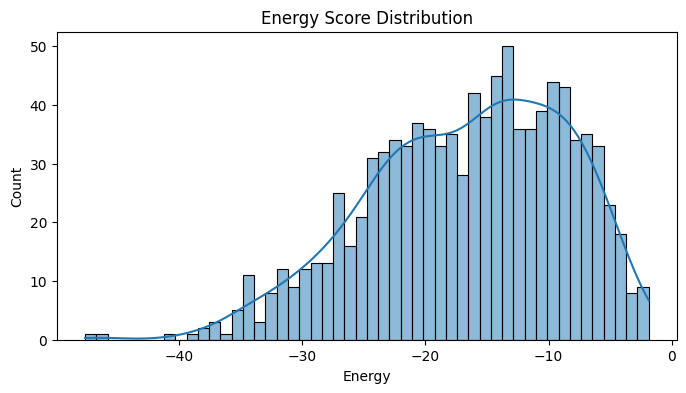

최적 Energy Threshold: -1.8595, Unknown F1: 0.9908

--- Classification Report ---
                          precision    recall  f1-score   support

         Motorcycle Horn       0.98      0.98      0.98        90
Motorcycle Running Sound       0.94      0.92      0.93        90
            Vehicle Horn       0.97      0.94      0.96        90
           Vehicle Siren       0.98      0.97      0.97        90
         Vehicle Driving       0.94      0.97      0.95        90
             Other Noise       0.99      0.99      0.99       540

                accuracy                           0.98       990
               macro avg       0.96      0.96      0.96       990
            weighted avg       0.98      0.98      0.98       990



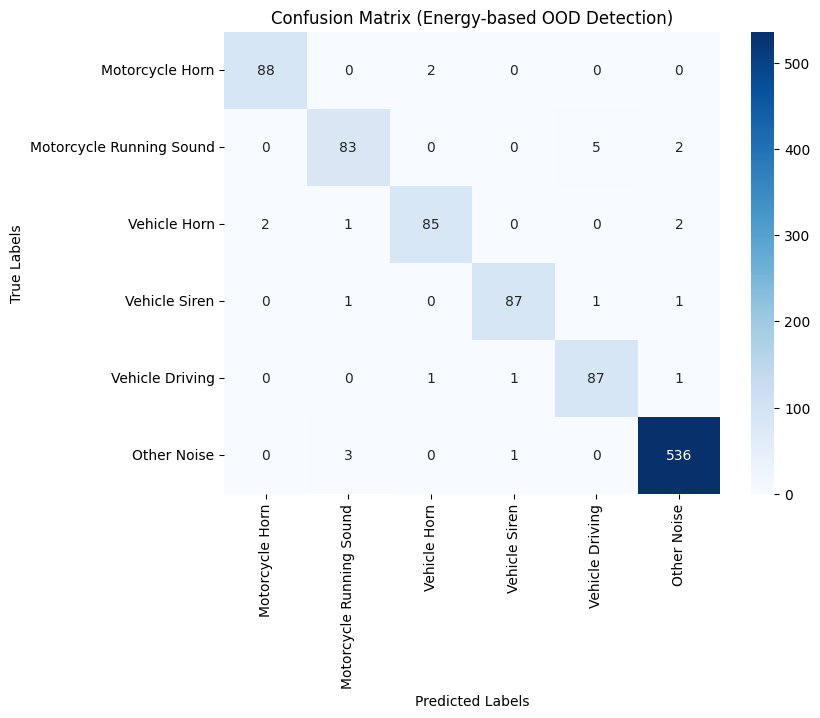

Overall Accuracy: 0.9758

--- Sample Predictions ---
Sample 0: True = 기타소음, Predicted = 기타소음, Energy Score = -11.5521
Sample 1: True = 기타소음, Predicted = 기타소음, Energy Score = -23.0595
Sample 2: True = 기타소음, Predicted = 기타소음, Energy Score = -16.2884
Sample 3: True = 기타소음, Predicted = 기타소음, Energy Score = -31.7990
Sample 4: True = 기타소음, Predicted = 기타소음, Energy Score = -15.7097
Sample 5: True = 기타소음, Predicted = 기타소음, Energy Score = -9.9492
Sample 6: True = 기타소음, Predicted = 기타소음, Energy Score = -8.2780
Sample 7: True = 기타소음, Predicted = 기타소음, Energy Score = -22.3631
Sample 8: True = 기타소음, Predicted = 기타소음, Energy Score = -5.8696
Sample 9: True = 기타소음, Predicted = 기타소음, Energy Score = -8.5291


In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.models import load_model, Model
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, roc_curve, auc
import tensorflow as tf

#############################################
# Part 1. 테스트 데이터 로드 및 전처리
#############################################
test_file = "final_csv/final_test_sampled_90_category_03.csv"
df_test = pd.read_csv(test_file)

# MFCC 특징 컬럼: "mfcc_1" ~ "mfcc_50"
mfcc_columns = [f"mfcc_{i}" for i in range(1, 51)]
X_test = df_test[mfcc_columns].values
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
print("Test data shape:", X_test.shape)

#############################################
# Part 1-2. 라벨 매핑 (최종 6개 라벨)
#############################################
# 교통 소음 5개: 이륜차경적, 이륜차주행음, 차량경적, 차량사이렌, 차량주행음
# 그 외는 '기타소음'
final_labels = ['이륜차경적', '이륜차주행음', '차량경적', '차량사이렌', '차량주행음', '기타소음']
english_labels = ['Motorcycle Horn', 'Motorcycle Running Sound', 'Vehicle Horn',
                  'Vehicle Siren', 'Vehicle Driving', 'Other Noise']

label_to_code = {label: i for i, label in enumerate(final_labels)}
unknown_label_index = label_to_code['기타소음']

if 'ood_label' in df_test.columns:
    df_test['encoded_label'] = df_test['ood_label'].map(lambda x: label_to_code.get(x, unknown_label_index))
else:
    raise ValueError("테스트 데이터에 'ood_label' 컬럼이 없습니다.")

y_true_ood = df_test['encoded_label'].values
print("Unique test labels:", np.unique(df_test['ood_label']))
print("Encoded test labels:", y_true_ood)

#############################################
# Part 2. 저장된 모델 로드 및 logits 모델 생성
#############################################
model_path = "model/resnet_model_modified_v6.h5"
model = load_model(model_path)
print(f"모델 {model_path} 로드 완료.")

# 모델의 마지막 레이어가 softmax인 경우, logits를 반환하는 모델로 수정합니다.
last_layer = model.layers[-1]
print("Last layer config:", last_layer.get_config())
if last_layer.get_config().get("activation") == "softmax":
    logits = Model(inputs=model.input, outputs=model.layers[-2].output)
    new_dense = Dense(last_layer.units, activation=None, name='logits')(logits.output)
    logits_model = Model(inputs=model.input, outputs=new_dense)
    logits_model.layers[-1].set_weights(last_layer.get_weights())
else:
    logits_model = model

#############################################
# Part 3. Energy Score 계산
#############################################
def compute_energy(logits, T=1.0):
    """
    Energy Score 계산:
       E(x) = -T * log( sum( exp( logits / T ) ) )
    """
    exp_vals = np.exp(logits / T)
    sum_exp = np.sum(exp_vals, axis=1) + 1e-9  # 안정성을 위해 epsilon 추가
    energy = -T * np.log(sum_exp)
    return energy

logits = logits_model.predict(X_test)
energy_scores = compute_energy(logits, T=1.0)

# 에너지 분포 시각화
plt.figure(figsize=(8, 4))
sns.histplot(energy_scores, bins=50, kde=True)
plt.title("Energy Score Distribution")
plt.xlabel("Energy")
plt.show()

#############################################
# Part 4. Softmax 예측 및 기본 예측 라벨
#############################################
exp_logits = np.exp(logits)
softmax_probs = exp_logits / np.sum(exp_logits, axis=1, keepdims=True)
y_pred_basic = np.argmax(softmax_probs, axis=1)

#############################################
# Part 5. 임계값 최적화 및 최종 예측
#############################################
confidence_threshold = 0.8  # Softmax 신뢰도 임계값
threshold_candidates = np.linspace(energy_scores.min(), energy_scores.max(), 100)
best_threshold = None
best_f1_unknown = -1

# Grid Search로 Energy Score의 최적 임계값 찾기
for thr in threshold_candidates:
    y_pred_candidate = np.where((np.max(softmax_probs, axis=1) < confidence_threshold) & (energy_scores > thr),
                                unknown_label_index, y_pred_basic)
    f1_unknown = f1_score(y_true_ood, y_pred_candidate, labels=[unknown_label_index], average='weighted', zero_division=0)
    if f1_unknown > best_f1_unknown:
        best_f1_unknown = f1_unknown
        best_threshold = thr

print(f"최적 Energy Threshold: {best_threshold:.4f}, Unknown F1: {best_f1_unknown:.4f}")

# 최종 예측
y_pred_final = np.where((np.max(softmax_probs, axis=1) < confidence_threshold) & (energy_scores > best_threshold),
                        unknown_label_index, y_pred_basic)

#############################################
# Part 6. 평가 및 시각화
#############################################
print("\n--- Classification Report ---")
report = classification_report(y_true_ood, y_pred_final, target_names=english_labels)
print(report)

cm = confusion_matrix(y_true_ood, y_pred_final)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=english_labels, yticklabels=english_labels)
plt.title("Confusion Matrix (Energy-based OOD Detection)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

overall_acc = accuracy_score(y_true_ood, y_pred_final)
print(f"Overall Accuracy: {overall_acc:.4f}")

#############################################
# Part 7. 일부 샘플 예측 결과 출력
#############################################
print("\n--- Sample Predictions ---")
index_to_label = {v: k for k, v in label_to_code.items()}
for i in range(10):
    true_lbl = index_to_label[y_true_ood[i]]
    pred_lbl = index_to_label[y_pred_final[i]]
    eng_score = energy_scores[i]
    print(f"Sample {i}: True = {true_lbl}, Predicted = {pred_lbl}, Energy Score = {eng_score:.4f}")


### 2) 모델 비학습 테스트 데이터 + OOD 코드

Test data shape: (1374, 50, 1)
Unique test labels: ['기타소음']
Encoded test labels: [5 5 5 ... 5 5 5]
모델 model/resnet_model_modified_v6.h5 로드 완료.
Last layer config: {'name': 'dense_2', 'trainable': True, 'dtype': 'float32', 'units': 6, 'activation': 'softmax', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}
43/43 [==============================] - 1s 8ms/step


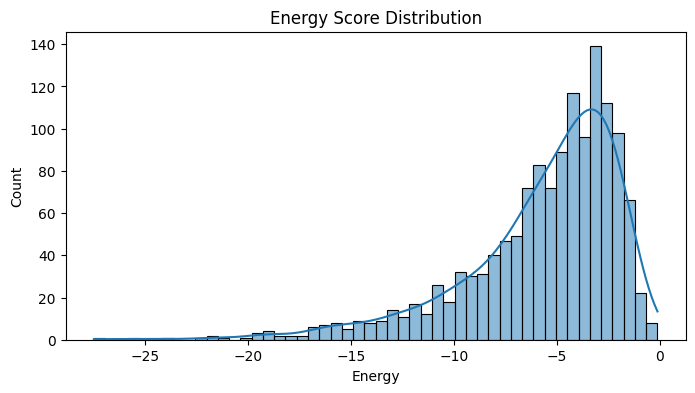

최적 Energy Threshold: -27.4814, Unknown F1: 0.7694

--- Classification Report ---
                          precision    recall  f1-score   support

         Motorcycle Horn       0.00      0.00      0.00         0
Motorcycle Running Sound       0.00      0.00      0.00         0
            Vehicle Horn       0.00      0.00      0.00         0
           Vehicle Siren       0.00      0.00      0.00         0
         Vehicle Driving       0.00      0.00      0.00         0
             Other Noise       1.00      0.63      0.77      1374

                accuracy                           0.63      1374
               macro avg       0.17      0.10      0.13      1374
            weighted avg       1.00      0.63      0.77      1374



/home/ubuntu/anaconda3/envs/ml_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ubuntu/anaconda3/envs/ml_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ubuntu/anaconda3/envs/ml_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


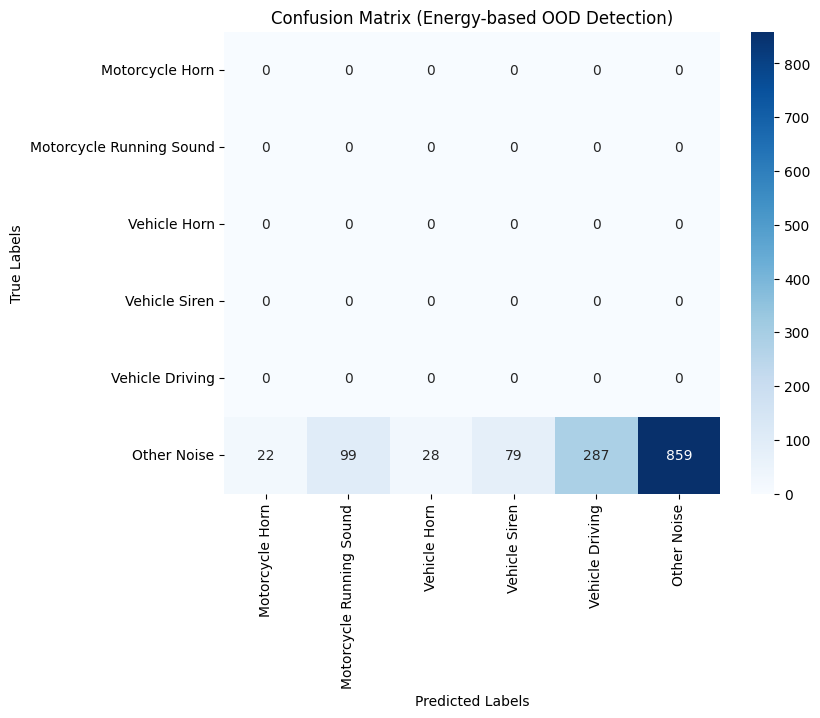

Overall Accuracy: 0.6252

--- Sample Predictions ---
Sample 0: True = 기타소음, Predicted = 기타소음, Energy Score = -5.4858
Sample 1: True = 기타소음, Predicted = 차량사이렌, Energy Score = -4.0147
Sample 2: True = 기타소음, Predicted = 기타소음, Energy Score = -5.9335
Sample 3: True = 기타소음, Predicted = 기타소음, Energy Score = -7.7172
Sample 4: True = 기타소음, Predicted = 기타소음, Energy Score = -2.0617
Sample 5: True = 기타소음, Predicted = 기타소음, Energy Score = -3.0168
Sample 6: True = 기타소음, Predicted = 이륜차경적, Energy Score = -5.9419
Sample 7: True = 기타소음, Predicted = 기타소음, Energy Score = -2.7637
Sample 8: True = 기타소음, Predicted = 기타소음, Energy Score = -9.5543
Sample 9: True = 기타소음, Predicted = 기타소음, Energy Score = -10.6599


In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.models import load_model, Model
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, roc_curve, auc
import tensorflow as tf

#############################################
# Part 1. 테스트 데이터 로드 및 전처리
#############################################
test_file = "final_csv/untrained other noises.csv"
df_test = pd.read_csv(test_file)

# MFCC 특징 컬럼: "mfcc_1" ~ "mfcc_50"
mfcc_columns = [f"mfcc_{i}" for i in range(1, 51)]
X_test = df_test[mfcc_columns].values
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
print("Test data shape:", X_test.shape)

#############################################
# Part 1-2. 라벨 매핑 (최종 6개 라벨)
#############################################
# 교통 소음 5개: 이륜차경적, 이륜차주행음, 차량경적, 차량사이렌, 차량주행음
# 그 외는 '기타소음'
final_labels = ['이륜차경적', '이륜차주행음', '차량경적', '차량사이렌', '차량주행음', '기타소음']
english_labels = ['Motorcycle Horn', 'Motorcycle Running Sound', 'Vehicle Horn',
                  'Vehicle Siren', 'Vehicle Driving', 'Other Noise']

label_to_code = {label: i for i, label in enumerate(final_labels)}
unknown_label_index = label_to_code['기타소음']

if 'ood_label' in df_test.columns:
    df_test['encoded_label'] = df_test['ood_label'].map(lambda x: label_to_code.get(x, unknown_label_index))
else:
    raise ValueError("테스트 데이터에 'ood_label' 컬럼이 없습니다.")

y_true_ood = df_test['encoded_label'].values
print("Unique test labels:", np.unique(df_test['ood_label']))
print("Encoded test labels:", y_true_ood)

#############################################
# Part 2. 저장된 모델 로드 및 logits 모델 생성
#############################################
model_path = "model/resnet_model_modified_v6.h5"
model = load_model(model_path)
print(f"모델 {model_path} 로드 완료.")

# 모델의 마지막 레이어가 softmax인 경우, logits를 반환하는 모델로 수정합니다.
last_layer = model.layers[-1]
print("Last layer config:", last_layer.get_config())
if last_layer.get_config().get("activation") == "softmax":
    logits = Model(inputs=model.input, outputs=model.layers[-2].output)
    new_dense = Dense(last_layer.units, activation=None, name='logits')(logits.output)
    logits_model = Model(inputs=model.input, outputs=new_dense)
    logits_model.layers[-1].set_weights(last_layer.get_weights())
else:
    logits_model = model

#############################################
# Part 3. Energy Score 계산
#############################################
def compute_energy(logits, T=1.0):
    """
    Energy Score 계산:
       E(x) = -T * log( sum( exp( logits / T ) ) )
    """
    exp_vals = np.exp(logits / T)
    sum_exp = np.sum(exp_vals, axis=1) + 1e-9  # 안정성을 위해 epsilon 추가
    energy = -T * np.log(sum_exp)
    return energy

logits = logits_model.predict(X_test)
energy_scores = compute_energy(logits, T=1.0)

# 에너지 분포 시각화
plt.figure(figsize=(8, 4))
sns.histplot(energy_scores, bins=50, kde=True)
plt.title("Energy Score Distribution")
plt.xlabel("Energy")
plt.show()

#############################################
# Part 4. Softmax 예측 및 기본 예측 라벨
#############################################
exp_logits = np.exp(logits)
softmax_probs = exp_logits / np.sum(exp_logits, axis=1, keepdims=True)
y_pred_basic = np.argmax(softmax_probs, axis=1)

#############################################
# Part 5. 임계값 최적화 및 최종 예측
#############################################
confidence_threshold = 0.8  # Softmax 신뢰도 임계값
threshold_candidates = np.linspace(energy_scores.min(), energy_scores.max(), 100)
best_threshold = None
best_f1_unknown = -1

# Grid Search로 Energy Score의 최적 임계값 찾기
for thr in threshold_candidates:
    y_pred_candidate = np.where((np.max(softmax_probs, axis=1) < confidence_threshold) & (energy_scores > thr),
                                unknown_label_index, y_pred_basic)
    f1_unknown = f1_score(y_true_ood, y_pred_candidate, labels=[unknown_label_index], average='weighted', zero_division=0)
    if f1_unknown > best_f1_unknown:
        best_f1_unknown = f1_unknown
        best_threshold = thr

print(f"최적 Energy Threshold: {best_threshold:.4f}, Unknown F1: {best_f1_unknown:.4f}")

# 최종 예측
y_pred_final = np.where((np.max(softmax_probs, axis=1) < confidence_threshold) & (energy_scores > best_threshold),
                        unknown_label_index, y_pred_basic)

#############################################
# Part 6. 평가 및 시각화
#############################################
print("\n--- Classification Report ---")
report = classification_report(y_true_ood, y_pred_final, target_names=english_labels)
print(report)

cm = confusion_matrix(y_true_ood, y_pred_final)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=english_labels, yticklabels=english_labels)
plt.title("Confusion Matrix (Energy-based OOD Detection)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

overall_acc = accuracy_score(y_true_ood, y_pred_final)
print(f"Overall Accuracy: {overall_acc:.4f}")

#############################################
# Part 7. 일부 샘플 예측 결과 출력
#############################################
print("\n--- Sample Predictions ---")
index_to_label = {v: k for k, v in label_to_code.items()}
for i in range(10):
    true_lbl = index_to_label[y_true_ood[i]]
    pred_lbl = index_to_label[y_pred_final[i]]
    eng_score = energy_scores[i]
    print(f"Sample {i}: True = {true_lbl}, Predicted = {pred_lbl}, Energy Score = {eng_score:.4f}")


## 4. OpenMax (스켈레톤) 코드

### 1) 기존 테스트 데이터 + OOD 탐지

Test data shape: (990, 50, 1)
31/31 [==============================] - 0s 7ms/step

--- Classification Report ---
                          precision    recall  f1-score   support

         Motorcycle Horn       0.94      0.92      0.93        90
Motorcycle Running Sound       0.85      0.86      0.85        90
            Vehicle Horn       0.86      0.88      0.87        90
           Vehicle Siren       0.99      0.93      0.96        90
         Vehicle Driving       0.90      0.87      0.88        90
                 Unknown       0.94      0.95      0.94       540

                accuracy                           0.92       990
               macro avg       0.91      0.90      0.91       990
            weighted avg       0.92      0.92      0.92       990



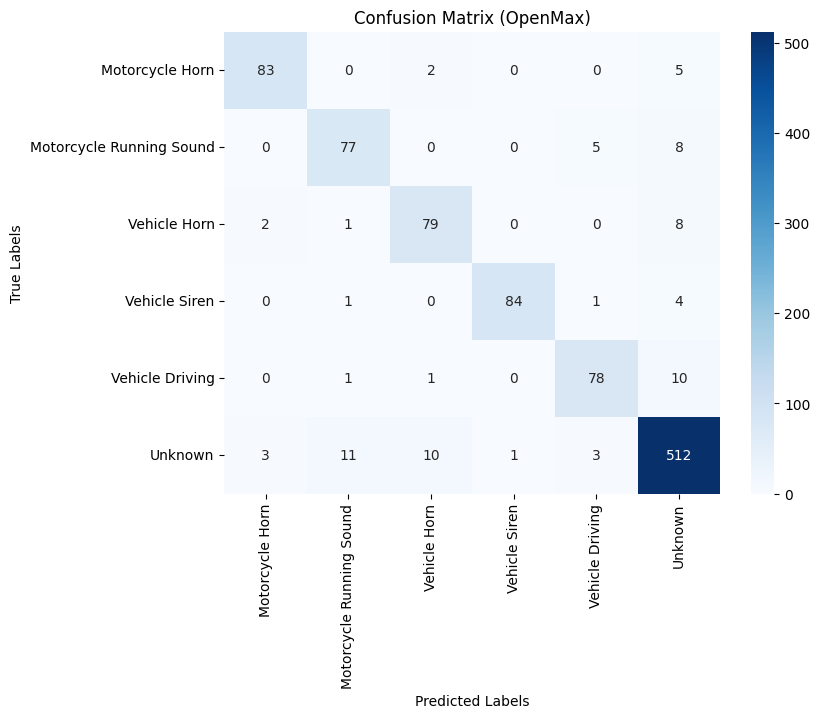

Overall Accuracy: 0.9222
Sample 0: True = 기타소음, Predicted = 기타소음
Sample 1: True = 기타소음, Predicted = 기타소음
Sample 2: True = 기타소음, Predicted = 기타소음
Sample 3: True = 기타소음, Predicted = 기타소음
Sample 4: True = 기타소음, Predicted = 기타소음
Sample 5: True = 기타소음, Predicted = 기타소음
Sample 6: True = 기타소음, Predicted = 기타소음
Sample 7: True = 기타소음, Predicted = 기타소음
Sample 8: True = 기타소음, Predicted = 기타소음
Sample 9: True = 기타소음, Predicted = 기타소음


In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.models import load_model, Model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from scipy.stats import weibull_min

#############################################
# 0. 데이터 및 모델 로드
#############################################
# Data Load Example
df_balanced_odd_sampled = pd.read_csv("final_csv/final_test_sampled_90_category_03.csv")
mfcc_columns = [f'mfcc_{i}' for i in range(1, 51)]

# 모델 로드
resnet_model = load_model('model/resnet_model_modified_v6.h5')
embedding_model = Model(inputs=resnet_model.input, outputs=resnet_model.layers[-2].output)

#############################################
# 1. 라벨 매핑 및 데이터 준비
#############################################
label_to_code = {
    '이륜차경적': 0,
    '이륜차주행음': 1,
    '차량경적': 2,
    '차량사이렌': 3,
    '차량주행음': 4,
    '기타소음': 5
}
df_test = df_balanced_odd_sampled.copy()

y_true_ood = df_test['ood_label'].map(lambda x: label_to_code.get(x, 5)).values
X_test = df_test[mfcc_columns].values
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
print(f"Test data shape: {X_test.shape}")

df_known = df_test[df_test['ood_label'] != '기타소음']
X_known = df_known[mfcc_columns].values
y_known = df_known['ood_label'].map(lambda x: label_to_code[x]).values
X_known = X_known.reshape(X_known.shape[0], X_known.shape[1], 1)

#############################################
# 2. 임베딩 및 Weibull 모델 생성
#############################################
embeddings_known = embedding_model.predict(X_known)
weibull_models = {}
class_means = {}
tail_size = 20

for cls in range(5):  # 정상 클래스만 사용
    cls_indices = np.where(y_known == cls)[0]
    cls_embeddings = embeddings_known[cls_indices]
    cls_mean = np.mean(cls_embeddings, axis=0)
    distances = np.linalg.norm(cls_embeddings - cls_mean, axis=1)
    tail_distances = np.sort(distances)[-tail_size:]
    weibull_params = weibull_min.fit(tail_distances, floc=0)
    weibull_models[cls] = weibull_params
    class_means[cls] = cls_mean

#############################################
# 3. OpenMax 점수 조정 함수 정의
#############################################
def compute_openmax_scores(softmax_probs, embeddings, class_means, weibull_models, alpharank=5):
    modified_scores = np.copy(softmax_probs[:, :5])  # 정상 클래스만 사용
    unknown_scores = np.zeros(softmax_probs.shape[0])

    for i in range(softmax_probs.shape[0]):
        for cls in range(5):  # 정상 클래스만 사용
            distance = np.linalg.norm(embeddings[i] - class_means[cls])
            weibull_cdf = weibull_min.cdf(distance, *weibull_models[cls])
            modified_scores[i, cls] *= (1 - weibull_cdf)
            unknown_scores[i] += softmax_probs[i, cls] * weibull_cdf

    modified_scores = np.hstack((modified_scores, unknown_scores.reshape(-1, 1)))
    modified_scores /= modified_scores.sum(axis=1, keepdims=True)
    return modified_scores

#############################################
# 4. 테스트 데이터 처리 및 예측
#############################################
softmax_probs = resnet_model.predict(X_test)
embeddings_test = embedding_model.predict(X_test)

openmax_probs = compute_openmax_scores(softmax_probs, embeddings_test, class_means, weibull_models)
y_pred_openmax = np.argmax(openmax_probs, axis=1)

#############################################
# 5. 평가 및 결과 분석
#############################################
english_labels = ['Motorcycle Horn', 'Motorcycle Running Sound', 'Vehicle Horn',
                  'Vehicle Siren', 'Vehicle Driving', 'Unknown']

print("\n--- Classification Report ---")
report = classification_report(y_true_ood, y_pred_openmax, target_names=english_labels)
print(report)

cm = confusion_matrix(y_true_ood, y_pred_openmax)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=english_labels, yticklabels=english_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix (OpenMax)")
plt.show()

accuracy = accuracy_score(y_true_ood, y_pred_openmax)
print(f"Overall Accuracy: {accuracy:.4f}")

#############################################
# 6. 일부 샘플 결과 출력
#############################################
index_to_label = {v: k for k, v in label_to_code.items()}
for i in range(10):
    true_label = index_to_label[y_true_ood[i]]
    pred_label = index_to_label[y_pred_openmax[i]]
    print(f"Sample {i}: True = {true_label}, Predicted = {pred_label}")

### 2) 모델 비학습 테스트 데이터 + OOD 코드

=> 기타소음만을 포함하는 데이터 테스트 불가

## 5. Feature-based Anomaly Detection using One-Class SVM

### 1) 기존 테스트 데이터 + OOD 탐지

Unique ood_label values: ['기타소음' '이륜차경적' '이륜차주행음' '차량경적' '차량사이렌' '차량주행음']
Encoded y_true: [5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0

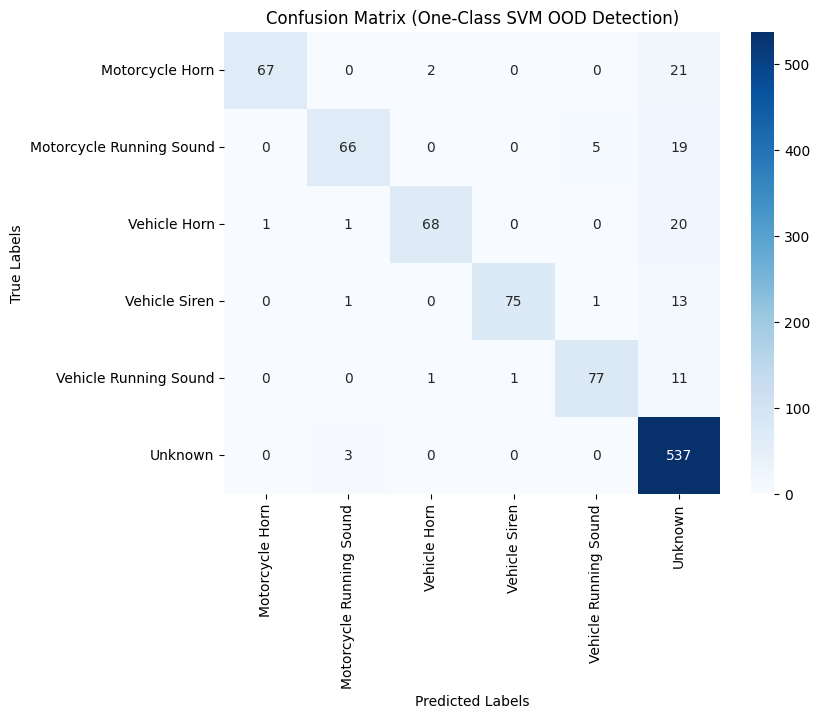

Overall Accuracy: 0.8990
Sample 0: True = 기타소음, Predicted = 기타소음, SVM Output = -1
Sample 1: True = 기타소음, Predicted = 기타소음, SVM Output = -1
Sample 2: True = 기타소음, Predicted = 기타소음, SVM Output = -1
Sample 3: True = 기타소음, Predicted = 기타소음, SVM Output = -1
Sample 4: True = 기타소음, Predicted = 기타소음, SVM Output = -1
Sample 5: True = 기타소음, Predicted = 기타소음, SVM Output = -1
Sample 6: True = 기타소음, Predicted = 기타소음, SVM Output = -1
Sample 7: True = 기타소음, Predicted = 기타소음, SVM Output = -1
Sample 8: True = 기타소음, Predicted = 기타소음, SVM Output = 1
Sample 9: True = 기타소음, Predicted = 기타소음, SVM Output = -1


In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import load_model, Model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.svm import OneClassSVM

###################################################
# 0. 데이터 로드 및 전처리 (사용자 환경에 맞게)
###################################################
df_balanced_odd_sampled = pd.read_csv('final_csv/final_test_sampled_90_category_03.csv') # 사용자 데이터셋 경로 수정

###################################################
# 1. 라벨 매핑 설정
###################################################
label_to_code = {
    '이륜차경적': 0,
    '이륜차주행음': 1,
    '차량경적': 2,
    '차량사이렌': 3,
    '차량주행음': 4
}
# Unknown(기타소음) 클래스는 6번째 클래스로 할당
unknown_label_index = 5
label_to_code['기타소음'] = unknown_label_index

# 실제 라벨 인코딩 (모델이 학습하지 않은 값도 Unknown으로 처리)
y_true_ood_str = df_balanced_odd_sampled['ood_label']
y_true = y_true_ood_str.map(lambda x: label_to_code.get(x, unknown_label_index)).values

print("Unique ood_label values:", df_balanced_odd_sampled['ood_label'].unique())
print("Encoded y_true:", y_true)

###################################################
# 2. 입력 데이터 준비
###################################################
mfcc_columns = [f'mfcc_{i}' for i in range(1, 51)]
X_all = df_balanced_odd_sampled[mfcc_columns].values
X_all = X_all.reshape((X_all.shape[0], X_all.shape[1], 1))
print(f"Input data shape: {X_all.shape}")

###################################################
# 3. 모델 로드 및 임베딩 모델 생성
###################################################
# 기본 분류 모델 로드 (원래 5개 클래스 softmax 출력)
resnet_model = load_model('model/resnet_model_modified_v6.h5') # 사용자 모델 경로 수정
print("Model input shape:", resnet_model.input_shape)

# Open‑set 인식을 위해 penultimate layer의 출력을 임베딩으로 사용
embedding_model = Model(inputs=resnet_model.input, outputs=resnet_model.layers[-2].output)

###################################################
# 4. 정상(known) 데이터(기타소음 제외) 준비 및 임베딩 추출
###################################################
# 정상 데이터: 'ood_label'이 기타소음("기타소음")이 아닌 데이터만 선택
df_known = df_balanced_odd_sampled[df_balanced_odd_sampled['ood_label'] != '기타소음']
X_known = df_known[mfcc_columns].values
X_known = X_known.reshape((X_known.shape[0], X_known.shape[1], 1))
# 정상 데이터 라벨 인코딩 (이미 0~4)
y_known = df_known['ood_label'].map(lambda x: label_to_code.get(x, unknown_label_index)).values

# 임베딩 추출 (정상 데이터)
embeddings_known = embedding_model.predict(X_known)
print(f"Embeddings shape (known): {embeddings_known.shape}")

###################################################
# 5. One-Class SVM 학습 (정상 데이터 임베딩 활용)
###################################################
# One-Class SVM: 정상 데이터의 분포만 학습하여, 새로운 샘플이 이 분포와 얼마나 다른지 판단
ocsvm = OneClassSVM(nu=0.05, kernel='rbf', gamma='auto') # 하이퍼파라미터 조정
ocsvm.fit(embeddings_known)
print("One-Class SVM 학습 완료.")

###################################################
# 6. 테스트 데이터 임베딩 추출 및 SVM 예측
###################################################
# 테스트 데이터(전체 데이터) 임베딩 추출
embeddings_all = embedding_model.predict(X_all)
print(f"Embeddings shape (all): {embeddings_all.shape}")

# One-Class SVM으로 예측: 정상은 1, 이상(즉, unknown)인 경우 -1 반환
svm_pred = ocsvm.predict(embeddings_all)
print("SVM 예측 결과 (예시):", svm_pred[:10])

###################################################
# 7. 기본 분류 모델의 softmax 예측 (정상 5개 클래스 예측)
###################################################
softmax_probs = resnet_model.predict(X_all) # shape: (num_samples, 5)
pred_labels_known = np.argmax(softmax_probs, axis=1) # 0~4

###################################################
# 8. 최종 예측: One-Class SVM 결과와 결합
###################################################
# 만약 SVM에서 이상치(-1)로 판단하면 Unknown (index 5)으로 할당, 정상(1)이면 기본 분류 예측을 사용
y_pred_final = np.where(svm_pred == -1, unknown_label_index, pred_labels_known)

###################################################
# 9. 평가: 분류 보고서, 혼동 행렬, 정확도 출력
###################################################
# 한글 라벨 매핑, 영어 라벨 매핑
index_to_label = {v: k for k, v in label_to_code.items()}
labels_in_order = [index_to_label[i] for i in range(len(index_to_label))]
english_labels = [
    'Motorcycle Horn',
    'Motorcycle Running Sound',
    'Vehicle Horn',
    'Vehicle Siren',
    'Vehicle Running Sound',
    'Unknown'
]

print("\n--- One-Class SVM OOD Detection Classification Report ---")
report = classification_report(y_true, y_pred_final, target_names=english_labels)
print(report)

cm = confusion_matrix(y_true, y_pred_final)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',xticklabels=english_labels, yticklabels=english_labels)
plt.title("Confusion Matrix (One-Class SVM OOD Detection)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

acc = accuracy_score(y_true, y_pred_final)
print(f"Overall Accuracy: {acc:.4f}")

###################################################
# 10. 일부 샘플 예측 결과 출력
###################################################
for i in range(10):
    true_lbl = index_to_label[y_true[i]]
    pred_lbl = index_to_label[y_pred_final[i]]
    svm_out = svm_pred[i]
    print(f"Sample {i}: True = {true_lbl}, Predicted = {pred_lbl}, SVM Output = {svm_out}")

### 2) 모델 비학습 테스트 데이터 + OOD 코드

=> 기타소음만을 포함하는 데이터 테스트 불가

## 6. Deep Ensemble Approach

### 1) 기존 테스트 데이터 + OOD 탐지

Test data shape: (990, 50, 1)
모델 로드 완료.
총 앙상블 모델 수: 2
31/31 [==============================] - 1s 8ms/step


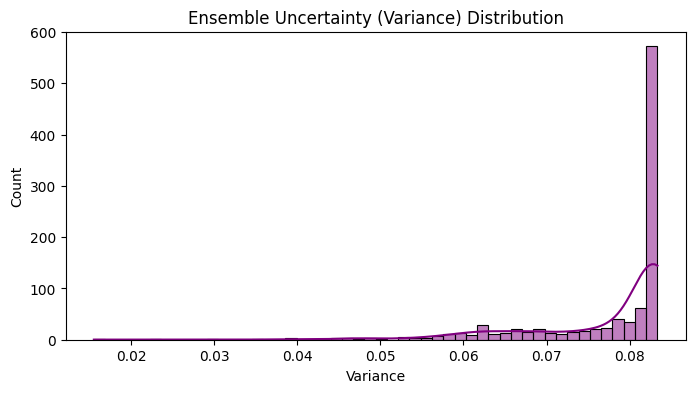

Manual uncertainty threshold: 0.1

--- Deep Ensemble Classification Report ---
                          precision    recall  f1-score   support

         Motorcycle Horn       0.94      0.94      0.94        90
Motorcycle Running Sound       0.94      0.83      0.88        90
            Vehicle Horn       0.83      0.83      0.83        90
           Vehicle Siren       0.88      0.97      0.92        90
   Vehicle Running Sound       0.95      0.96      0.95        90
                 Unknown       0.99      0.99      0.99       540

                accuracy                           0.95       990
               macro avg       0.92      0.92      0.92       990
            weighted avg       0.95      0.95      0.95       990



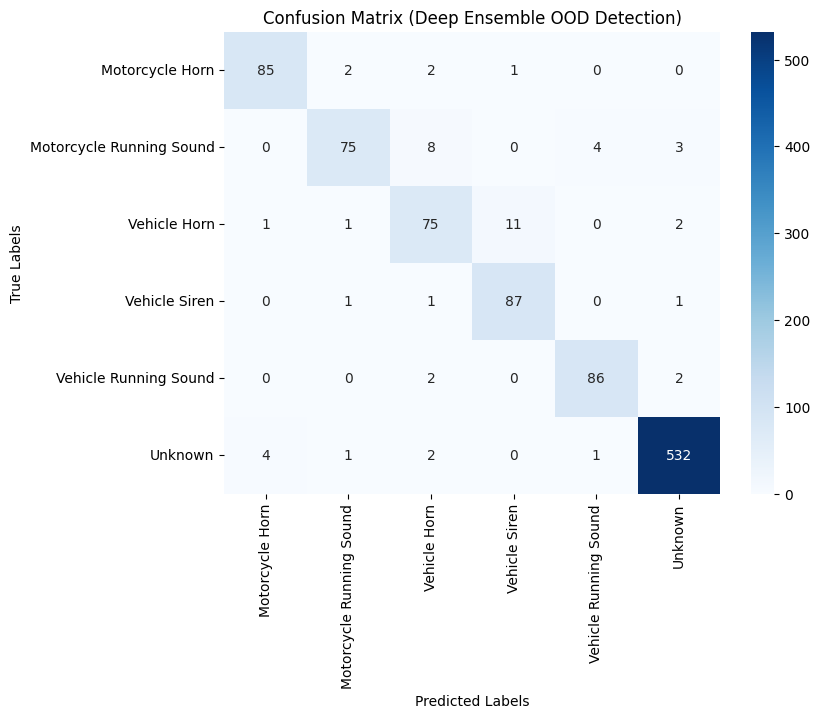

Overall Accuracy: 0.9495
Sample 0: True = 기타소음, Predicted = 기타소음, Uncertainty = 0.0830
Sample 1: True = 기타소음, Predicted = 기타소음, Uncertainty = 0.0800
Sample 2: True = 기타소음, Predicted = 기타소음, Uncertainty = 0.0833
Sample 3: True = 기타소음, Predicted = 기타소음, Uncertainty = 0.0823
Sample 4: True = 기타소음, Predicted = 기타소음, Uncertainty = 0.0833
Sample 5: True = 기타소음, Predicted = 기타소음, Uncertainty = 0.0832
Sample 6: True = 기타소음, Predicted = 기타소음, Uncertainty = 0.0832
Sample 7: True = 기타소음, Predicted = 기타소음, Uncertainty = 0.0833
Sample 8: True = 기타소음, Predicted = 기타소음, Uncertainty = 0.0775
Sample 9: True = 기타소음, Predicted = 기타소음, Uncertainty = 0.0705


In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#############################################
# Part 0: 데이터 로드 및 전처리
#############################################
test_df = pd.read_csv("final_csv/final_test_sampled_90_category_03.csv")

#############################################
# Part 1: 라벨 매핑 및 인코딩
#############################################
label_list = ['이륜차경적', '이륜차주행음', '차량경적', '차량사이렌', '차량주행음']
label_to_code = {label: i for i, label in enumerate(label_list)}
unknown_label_index = 5
label_to_code['기타소음'] = unknown_label_index

if 'ood_label' in test_df.columns:
    test_df['encoded_label'] = test_df['ood_label'].map(lambda x: label_to_code.get(x, unknown_label_index))
else:
    raise ValueError("테스트 데이터에 'ood_label' 컬럼이 없습니다.")
y_test_true = test_df['encoded_label'].values

#############################################
# Part 2: 입력 데이터 준비 (MFCC 특징)
#############################################
mfcc_columns = [f'mfcc_{i}' for i in range(1, 51)]
X_test = test_df[mfcc_columns].values
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
print(f"Test data shape: {X_test.shape}")

#############################################
# Part 3: 사전 학습된 모델 로드
#############################################
cnn2_model = load_model('/home/lab06/git/noise-data-platform/model/cnn2_6classfication_category_03.h5')
resnet_model = load_model('model/resnet_model_modified_v6.h5')
print("모델 로드 완료.")

#############################################
# Part 4: Deep Ensemble 구성
#############################################
ensemble_models = [cnn2_model, resnet_model]
print(f"총 앙상블 모델 수: {len(ensemble_models)}")

all_preds = []
for model in ensemble_models:
    preds = model.predict(X_test)  # 각 모델의 예측: (num_samples, 6)
    all_preds.append(preds)
all_preds = np.array(all_preds)  # shape: (num_models, num_samples, 6)
ensemble_probs = np.mean(all_preds, axis=0)  # (num_samples, 6)
y_pred_basic = np.argmax(ensemble_probs, axis=1)

#############################################
# Part 5: Ensemble 불확실성 산출 (예측 분산 기반)
#############################################
ensemble_variance = np.var(all_preds, axis=0)  # (num_samples, 6)
uncertainty = np.mean(ensemble_variance, axis=1)  # 각 샘플에 대한 평균 분산

plt.figure(figsize=(8, 4))
sns.histplot(uncertainty, bins=50, kde=True, color='purple')
plt.title("Ensemble Uncertainty (Variance) Distribution")
plt.xlabel("Variance")
plt.show()

#############################################
# Part 6: 최종 예측 결합 (불확실성이 높으면 Unknown으로 할당)
#############################################
manual_threshold = 0.1  # 실험적으로 조정: 0.03 ~ 0.1 범위에서
print("Manual uncertainty threshold:", manual_threshold)
y_pred_final = np.where(uncertainty > manual_threshold, unknown_label_index, y_pred_basic)

#############################################
# Part 7: 평가 (분류 보고서, 혼동 행렬, 정확도)
#############################################
english_labels = ['Motorcycle Horn', 'Motorcycle Running Sound', 'Vehicle Horn',
                  'Vehicle Siren', 'Vehicle Running Sound', 'Unknown']
index_to_label = {v: k for k, v in label_to_code.items()}
labels_in_order = [index_to_label[i] for i in range(len(index_to_label))]

print("\n--- Deep Ensemble Classification Report ---")
report = classification_report(y_test_true, y_pred_final, target_names=english_labels)
print(report)

cm = confusion_matrix(y_test_true, y_pred_final)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=english_labels, yticklabels=english_labels)
plt.title("Confusion Matrix (Deep Ensemble OOD Detection)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

acc = accuracy_score(y_test_true, y_pred_final)
print(f"Overall Accuracy: {acc:.4f}")

#############################################
# Part 8: 일부 샘플 예측 결과 출력
#############################################
for i in range(10):
    true_lbl = index_to_label[y_test_true[i]]
    pred_lbl = index_to_label[y_pred_final[i]]
    uncert = uncertainty[i]
    print(f"Sample {i}: True = {true_lbl}, Predicted = {pred_lbl}, Uncertainty = {uncert:.4f}")

### 2) 모델 비학습 테스트 데이터 + OOD 코드

Test data shape: (1374, 50, 1)
모델 로드 완료.
총 앙상블 모델 수: 2
43/43 [==============================] - 1s 8ms/step


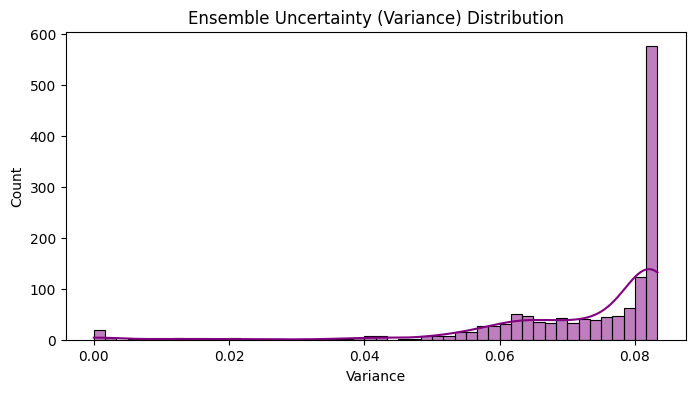

Manual uncertainty threshold: 0.1

--- Deep Ensemble Classification Report ---
                          precision    recall  f1-score   support

         Motorcycle Horn       0.00      0.00      0.00         0
Motorcycle Running Sound       0.00      0.00      0.00         0
            Vehicle Horn       0.00      0.00      0.00         0
           Vehicle Siren       0.00      0.00      0.00         0
   Vehicle Running Sound       0.00      0.00      0.00         0
                 Unknown       1.00      0.26      0.41      1374

                accuracy                           0.26      1374
               macro avg       0.17      0.04      0.07      1374
            weighted avg       1.00      0.26      0.41      1374



/home/ubuntu/anaconda3/envs/ml_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ubuntu/anaconda3/envs/ml_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ubuntu/anaconda3/envs/ml_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


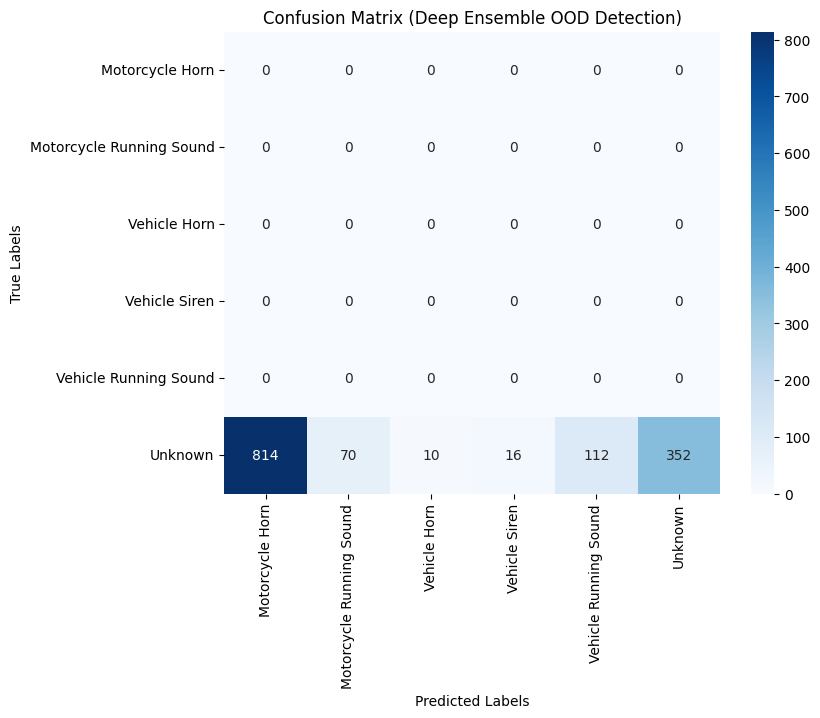

Overall Accuracy: 0.2562
Sample 0: True = 기타소음, Predicted = 기타소음, Uncertainty = 0.0829
Sample 1: True = 기타소음, Predicted = 차량사이렌, Uncertainty = 0.0727
Sample 2: True = 기타소음, Predicted = 기타소음, Uncertainty = 0.0822
Sample 3: True = 기타소음, Predicted = 기타소음, Uncertainty = 0.0621
Sample 4: True = 기타소음, Predicted = 이륜차경적, Uncertainty = 0.0131
Sample 5: True = 기타소음, Predicted = 이륜차경적, Uncertainty = 0.0628
Sample 6: True = 기타소음, Predicted = 이륜차경적, Uncertainty = 0.0000
Sample 7: True = 기타소음, Predicted = 이륜차경적, Uncertainty = 0.0737
Sample 8: True = 기타소음, Predicted = 기타소음, Uncertainty = 0.0734
Sample 9: True = 기타소음, Predicted = 기타소음, Uncertainty = 0.0812


In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#############################################
# Part 0: 데이터 로드 및 전처리
#############################################
test_df = pd.read_csv("final_csv/untrained other noises.csv")

#############################################
# Part 1: 라벨 매핑 및 인코딩
#############################################
label_list = ['이륜차경적', '이륜차주행음', '차량경적', '차량사이렌', '차량주행음']
label_to_code = {label: i for i, label in enumerate(label_list)}
unknown_label_index = 5
label_to_code['기타소음'] = unknown_label_index

if 'ood_label' in test_df.columns:
    test_df['encoded_label'] = test_df['ood_label'].map(lambda x: label_to_code.get(x, unknown_label_index))
else:
    raise ValueError("테스트 데이터에 'ood_label' 컬럼이 없습니다.")
y_test_true = test_df['encoded_label'].values

#############################################
# Part 2: 입력 데이터 준비 (MFCC 특징)
#############################################
mfcc_columns = [f'mfcc_{i}' for i in range(1, 51)]
X_test = test_df[mfcc_columns].values
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
print(f"Test data shape: {X_test.shape}")

#############################################
# Part 3: 사전 학습된 모델 로드
#############################################
cnn2_model = load_model('/home/lab06/git/noise-data-platform/model/cnn2_6classfication_category_03.h5')
resnet_model = load_model('model/resnet_model_modified_v6.h5')
print("모델 로드 완료.")

#############################################
# Part 4: Deep Ensemble 구성
#############################################
ensemble_models = [cnn2_model, resnet_model]
print(f"총 앙상블 모델 수: {len(ensemble_models)}")

all_preds = []
for model in ensemble_models:
    preds = model.predict(X_test)  # 각 모델의 예측: (num_samples, 6)
    all_preds.append(preds)
all_preds = np.array(all_preds)  # shape: (num_models, num_samples, 6)
ensemble_probs = np.mean(all_preds, axis=0)  # (num_samples, 6)
y_pred_basic = np.argmax(ensemble_probs, axis=1)

#############################################
# Part 5: Ensemble 불확실성 산출 (예측 분산 기반)
#############################################
ensemble_variance = np.var(all_preds, axis=0)  # (num_samples, 6)
uncertainty = np.mean(ensemble_variance, axis=1)  # 각 샘플에 대한 평균 분산

plt.figure(figsize=(8, 4))
sns.histplot(uncertainty, bins=50, kde=True, color='purple')
plt.title("Ensemble Uncertainty (Variance) Distribution")
plt.xlabel("Variance")
plt.show()

#############################################
# Part 6: 최종 예측 결합 (불확실성이 높으면 Unknown으로 할당)
#############################################
manual_threshold = 0.1  # 실험적으로 조정: 0.03 ~ 0.1 범위에서
print("Manual uncertainty threshold:", manual_threshold)
y_pred_final = np.where(uncertainty > manual_threshold, unknown_label_index, y_pred_basic)

#############################################
# Part 7: 평가 (분류 보고서, 혼동 행렬, 정확도)
#############################################
english_labels = ['Motorcycle Horn', 'Motorcycle Running Sound', 'Vehicle Horn',
                  'Vehicle Siren', 'Vehicle Running Sound', 'Unknown']
index_to_label = {v: k for k, v in label_to_code.items()}
labels_in_order = [index_to_label[i] for i in range(len(index_to_label))]

print("\n--- Deep Ensemble Classification Report ---")
report = classification_report(y_test_true, y_pred_final, target_names=english_labels)
print(report)

cm = confusion_matrix(y_test_true, y_pred_final)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=english_labels, yticklabels=english_labels)
plt.title("Confusion Matrix (Deep Ensemble OOD Detection)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

acc = accuracy_score(y_test_true, y_pred_final)
print(f"Overall Accuracy: {acc:.4f}")

#############################################
# Part 8: 일부 샘플 예측 결과 출력
#############################################
for i in range(10):
    true_lbl = index_to_label[y_test_true[i]]
    pred_lbl = index_to_label[y_pred_final[i]]
    uncert = uncertainty[i]
    print(f"Sample {i}: True = {true_lbl}, Predicted = {pred_lbl}, Uncertainty = {uncert:.4f}")